Q1. Explain the difference between linear regression and logistic regression models. Provide an example of
a scenario where logistic regression would be more appropriate.

In [2]:
# Linear Regression:

# Used for predicting continuous values (e.g., price, temperature).
# The output is a real number.
# # Uses the equation:
# y = B0 + B1*x + B2*x^2 + ... + Bn*x^n
 
# Logistic Regression:
# Used for classification problems (e.g., spam vs. not spam).
# The output is a probability, mapped to 0 or 1 using the sigmoid function.
# Equation:
# P(y = 1) = 1/(1 + e^(B0 + B1*x + B2*x^2 + ... + Bn*x^n))

# Example Scenario for Logistic Regression:
# Predicting whether a student will pass (1) or fail (0) an exam based on study hours and attendance.

Q2. What is the cost function used in logistic regression, and how is it optimized?

In [6]:
# Cost Function:

# Logistic regression uses Log Loss (Binary Cross-Entropy Loss):
# J(theta) = - 1/m * (summation from i = 1 to m) [(y * log(h(x^(i))) + (1-y^(i)) * log(1-h(x^(i))))]

# Where:

# h theta(x)-> is the sigmoid function

# y -> is the true label

# m-> is the number of samples

# Optimization:

# Optimized using Gradient Descent to minimize the cost function by updating weights iteratively:
# theta = theta - alpha * gradient


Q3. Explain the concept of regularization in logistic regression and how it helps prevent overfitting.

Q4. What is the ROC curve, and how is it used to evaluate the performance of the logistic regression
model?



In [11]:
# ROC Curve (Receiver Operating Characteristic):
# Plots True Positive Rate (Recall) vs False Positive Rate at different thresholds.

# How it helps:
 # Shows how well the model separates the classes.
 # AUC (Area Under Curve) summarizes the ROC curve.
  # AUC = 1 → perfect model
  # AUC = 0.5 → random guess
 
 

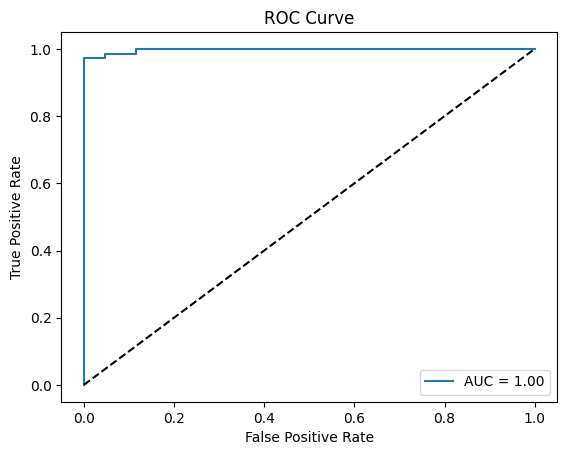

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target  # y = 1 for malignant, 0 for benign

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict probabilities (not class labels)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for class 1 (malignant)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Q5. What are some common techniques for feature selection in logistic regression? How do these
techniques help improve the model's performance?

In [7]:
# Feature Selection Techniques:
# Recursive Feature Elimination (RFE)
# L1 Regularization (Lasso)
# Univariate Statistical Tests (e.g., Chi-Square, ANOVA)
# Information Gain / Mutual Information
# Correlation Matrix (to remove highly correlated features)

# Benefits:
# Reduces overfitting.
# Improves model interpretability and speed.
# Enhances generalization on unseen data.

Q6. How can you handle imbalanced datasets in logistic regression? What are some strategies for dealing
with class imbalance?

In [8]:
# Strategies:

# 1.Resampling:
# Oversampling minority class (e.g., SMOTE)
# Undersampling majority class

# 2.Class Weights:
# Assign higher penalty to misclassifying minority class
# model = LogisticRegression(class_weight='balanced')

#3.Use Evaluation Metrics:
# Precision, Recall, F1-score instead of just Accuracy
# ROC-AUC, PR Curve

#4.Threshold Tuning:
# Adjust decision threshold from 0.5 to optimize recall/precision

Q7. Can you discuss some common issues and challenges that may arise when implementing logistic
regression, and how they can be addressed? For example, what can be done if there is multicollinearity
among the independent variables?

In [10]:
# Issue	
# Multicollinearity (high correlation between independent variables)
# Solution
# - Use Variance Inflation Factor (VIF) to detect
# - Remove or combine correlated features
# - Use PCA

# Issue	
#non linear relationship
#solution -> use polynomial features or switch to a non linear model

#issue
#outliers
#solution -> use robust scaling or remove extreme outliers

#issue
#imbalanced data 
#solution-> apply class weighting or resampling

#issue
#overfitting
#solution-> use regularization, early stopping, or cross-validation

#issue
#too many irrelevant features 
#solution-> perform feature selection